###**Data loading**

In [43]:
import pandas as pd

In [44]:
df=pd.read_csv('delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


###  **Data spliting**

In [45]:
y=df['logS']
X=df.drop('logS',axis=1)

### **Training the data**




In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

### **Building model using Linear Regression**

In [47]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(X_train_scaled,y_train)

LinearRegression()

In [48]:
y_test_predict=lr_model.predict(X_test_scaled)
y_train_predict=lr_model.predict(X_train_scaled)

### **Evaluating the model**

In [49]:
from sklearn.metrics import mean_squared_error,r2_score
y_test_mse=mean_squared_error(y_test,y_test_predict)
y_test_r2_score=r2_score(y_test,y_test_predict)

y_train_mse=mean_squared_error(y_train,y_train_predict)
y_train_r2_score=r2_score(y_train,y_train_predict)



In [50]:
model_evaluation=pd.DataFrame(['Linear Regression',y_test_mse,y_test_r2_score,y_train_mse,y_train_r2_score]).T
model_evaluation.columns=['Model','Test MSE','Test R2','Train MSE','Train R2']

In [51]:
model_evaluation

,Model,Test MSE,Test R2,Train MSE,Train R2
0,Linear Regression,0.96275,0.772911,1.02777,0.768621


### **Creating RandomForestRegressor Model**

In [52]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, random_state=42)

rf.fit(X_train_scaled,y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [53]:
y_test_predict1=rf.predict(X_test_scaled)
y_train_predict1=rf.predict(X_train_scaled)

In [54]:
y_test_mse1=mean_squared_error(y_test,y_test_predict1)
y_test_r2_score1=r2_score(y_test,y_test_predict1)

y_train_mse1=mean_squared_error(y_train,y_train_predict1)
y_train_r2_score1=r2_score(y_train,y_train_predict1)



## **Creating combined Evaluation Table**

In [55]:
model_evaluation1=pd.DataFrame(['RandomForestRegresson',y_test_mse1,y_test_r2_score1,y_train_mse1,y_train_r2_score1]).T
model_evaluation1.columns=['Model','Test MSE','Test R2','Train MSE','Train R2']

In [56]:
Evaluation_table=pd.concat([model_evaluation,model_evaluation1],axis=0)
Evaluation_table=Evaluation_table.reset_index(drop=True)
Evaluation_table

,Model,Test MSE,Test R2,Train MSE,Train R2
0,Linear Regression,0.96275,0.772911,1.02777,0.768621
1,RandomForestRegresson,0.485255,0.88554,0.091579,0.979383


### **Creating Scatter plot**

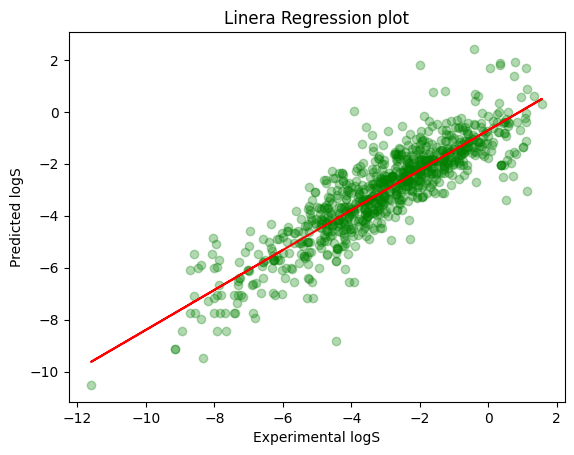

In [57]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(x=y_train,y=y_train_predict,alpha=0.3,c='green')
plt.xlabel('Experimental logS')
plt.ylabel('Predicted logS')

z=np.polyfit(y_train,y_train_predict,1)
p=np.poly1d(z)
plt.plot(y_train,p(y_train),c='red')
plt.title('Linera Regression plot')
plt.show()

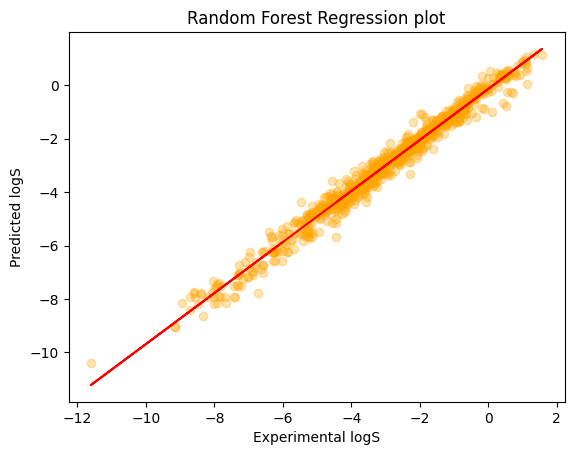

In [58]:
plt.scatter(x=y_train,y=y_train_predict1,alpha=0.3,c='orange')
plt.xlabel('Experimental logS')
plt.ylabel('Predicted logS')

z=np.polyfit(y_train,y_train_predict1,1)
p=np.poly1d(z)
plt.plot(y_train,p(y_train),c='red')
plt.title('Random Forest Regression plot')
plt.show()

### **Testing the model with sample data**

In [59]:
sample_df=X.head()
sample_df=scaler.transform(sample_df)

In [60]:
prediction=rf.predict(sample_df)

In [61]:
prediction

array([-2.24732167, -2.00866417, -2.55095417, -1.72626167, -3.02099   ])

In [62]:
y.head()

0   -2.18
1   -2.00
2   -1.74
3   -1.48
4   -3.04
Name: logS, dtype: float64

In [63]:
import pickle
with open('rf.pkl', 'wb') as f:
    pickle.dump(rf, f)

with open('scaler.pkl', 'wb') as f: 
    pickle.dump(scaler, f)